In [121]:
##importing necessary libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import plotly.express as px
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing the data

In [122]:
df = pd.read_csv("c:/Users/RATHIKA/oasis/car data.csv")

In [123]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [124]:
df.describe(include=['object'])

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


<AxesSubplot:>

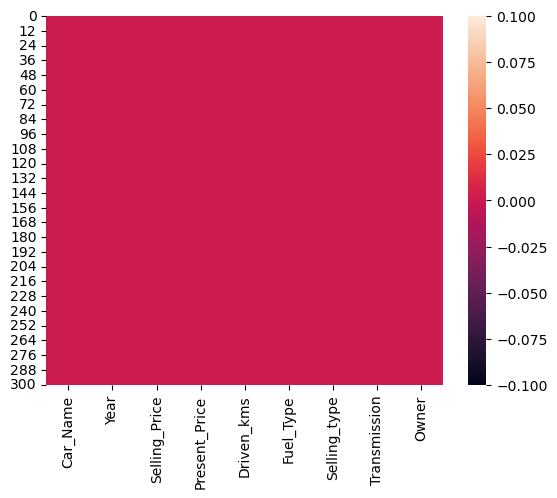

In [125]:
sns.heatmap(df.isnull())

In [126]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [127]:
car_name_frq = df['Car_Name'].value_counts()
car_name_frq

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [128]:
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [129]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [130]:
Selling_type_frq = df['Selling_type'].value_counts()
Selling_type_frq

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

([<matplotlib.patches.Wedge at 0x261e6e889a0>,
 [Text(-0.4927289809533005, 0.9834724964780268, 'Dealer'),
  Text(0.49272907303263863, -0.9834724503454059, 'Individual')],
 [Text(-0.2687612623381639, 0.5364395435334691, '65%'),
  Text(0.2687613125632574, -0.5364395183702213, '35%')])

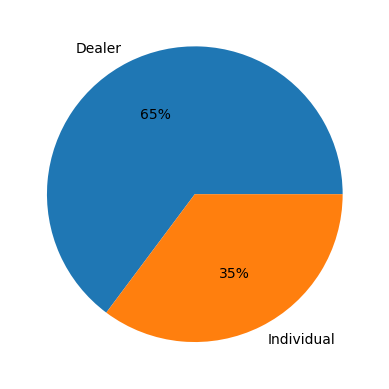

In [131]:
plt.pie(Selling_type_frq,labels=Selling_type_frq.keys(),autopct='%.0f%%')

# From the above graph,the delaer has most number of used car than the individual

In [132]:

result =df.loc[df.groupby('Car_Name')['Selling_Price'].idxmax()]
result = result.sort_values(by=['Year','Selling_Price'])

result

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
189,Hero Super Splendor,2005,0.20,0.57,55000,Petrol,Individual,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1
...,...,...,...,...,...,...,...,...,...
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0


In [202]:
result =df.loc[df.groupby('Fuel_type')['Selling_Price'].idxmax()]
result = result.sort_values(by=['Fuel_type','Selling_Price'])

result

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_type,Selling_type,car_name_frq
18,2015,3.25,5.09,35500,0,1,1,4
86,2010,35.00,92.60,78000,0,2,1,1
66,2017,19.75,23.15,11000,0,3,1,9


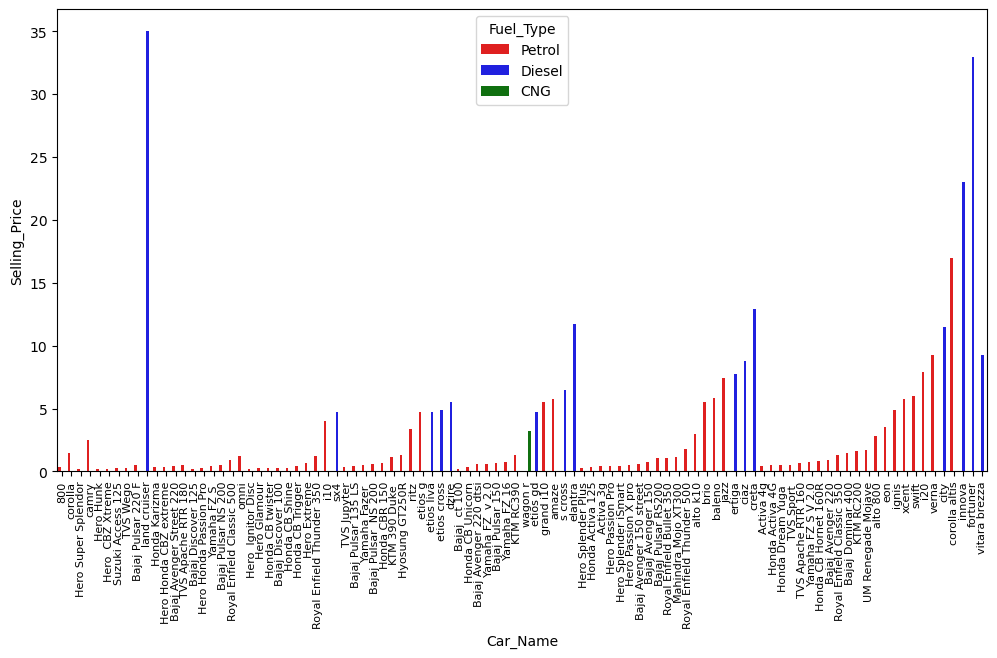

In [197]:
plt.figure(figsize=(12,6))
custom_pallete = ['#FF0000','#0000FF','#008000']
ax = sns.barplot(x='Car_Name',y='Selling_Price',hue = 'Fuel_Type', data=result,palette = custom_pallete)
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.show()

# The above graph shows:
# Land crusier diesel fuel type has the highest selling price followed by fortuner diesel varient
# In petrol fuel type corolla altis has highest selling price followed by verna



# 

In [134]:
df1 = pd.get_dummies(df['Transmission'])
df1.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [135]:
m=df1['Manual'].sum()
a=df1['Automatic'].sum()
print(" The Manual gear:",m)
print(" The Automatic gear:",a)

 The Manual gear: 261
 The Automatic gear: 40


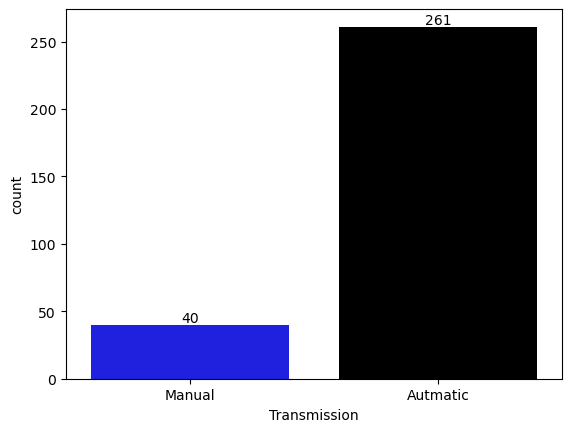

In [136]:
custom={'Manual' : 'blue', 'Automatic':'black'}
ax =sns.countplot(data=df1, x='Manual', palette=custom.values())
plt.xlabel('Transmission')
plt.xticks([0,1],['Manual','Autmatic'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha = 'center',va='bottom')
plt.show()    

In [137]:
df.drop('Transmission',axis=1,inplace=True)

In [138]:
merged=pd.concat([df,df1],axis =1)
merged

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Owner,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,0,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,0,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,0,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,0,0,1


In [139]:
df2=pd.get_dummies(df['Selling_type'])
df3 = pd.get_dummies(df['Fuel_Type'])
df3.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [140]:
df.drop('Selling_type',axis=1,inplace=True)
df.drop('Fuel_Type',axis=1,inplace=True)



In [141]:
merged=pd.concat([df,df2,df3],axis =1)
merged

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Dealer,Individual,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1,0
297,brio,2015,4.00,5.90,60000,0,1,0,0,0,1
298,city,2009,3.35,11.00,87934,0,1,0,0,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1,0


In [142]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Owner          301 non-null    int64  
 6   Dealer         301 non-null    uint8  
 7   Individual     301 non-null    uint8  
 8   CNG            301 non-null    uint8  
 9   Diesel         301 non-null    uint8  
 10  Petrol         301 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(5)
memory usage: 15.7+ KB


In [143]:
df['Fuel_type']= merged.apply(lambda row:1 if row['CNG'] ==1 else(2 if row['Diesel'] ==1 else 3),axis =1 )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Owner          301 non-null    int64  
 6   Fuel_type      301 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 16.6+ KB


In [145]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_type
0,ritz,2014,3.35,5.59,27000,0,3
1,sx4,2013,4.75,9.54,43000,0,2
2,ciaz,2017,7.25,9.85,6900,0,3
3,wagon r,2011,2.85,4.15,5200,0,3
4,swift,2014,4.60,6.87,42450,0,2


In [148]:
df['Selling_type']= merged.apply(lambda row:1 if row['Dealer'] ==1 else 2,axis =1 )
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_type,Selling_type
0,ritz,2014,3.35,5.59,27000,0,3,1
1,sx4,2013,4.75,9.54,43000,0,2,1
2,ciaz,2017,7.25,9.85,6900,0,3,1
3,wagon r,2011,2.85,4.15,5200,0,3,1
4,swift,2014,4.60,6.87,42450,0,2,1


In [149]:
CNG_count =merged['CNG'].sum()
Petrol_count=merged['Petrol'].sum()
Diesel_count=merged['Diesel'].sum()
CNG_count,Petrol_count,Diesel_count

(2, 239, 60)

In [152]:
selling_counts = {'CNG': {'Dealer': 0, 'Individual': 0},
                   'Diesel': {'Dealer': 0, 'Individual': 0},
                   'Petrol': {'Dealer': 0, 'Individual': 0}}

# Iterate through the DataFrame and count selling type in each fuel type
for index, row in merged.iterrows():
    for category in ['CNG', 'Diesel', 'Petrol']:
        if row[category] == 1:
            if row['Dealer'] == 1:
                selling_counts[category]['Dealer'] += 1
            else:
                selling_counts[category]['Individual'] += 1

# Display the counts
print(pd.DataFrame(selling_counts).transpose())

        Dealer  Individual
CNG          2           0
Diesel      59           1
Petrol     134         105


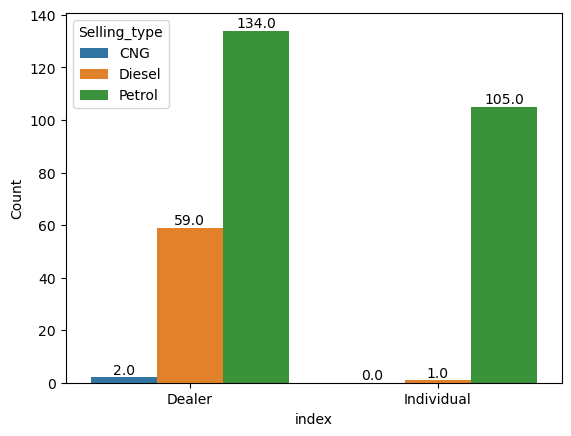

In [155]:
count_df= pd.DataFrame(selling_counts)
count_df=count_df.reset_index()
melted_df=pd.melt(count_df,id_vars='index',var_name ='Selling_type',value_name = 'Count')

ax = sns.barplot(x='index',y='Count',hue = 'Selling_type',data=melted_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha = 'center',va='bottom')
plt.show()


# The above shows petrol fuel type has the highest selling varient for both with the dealer and individual

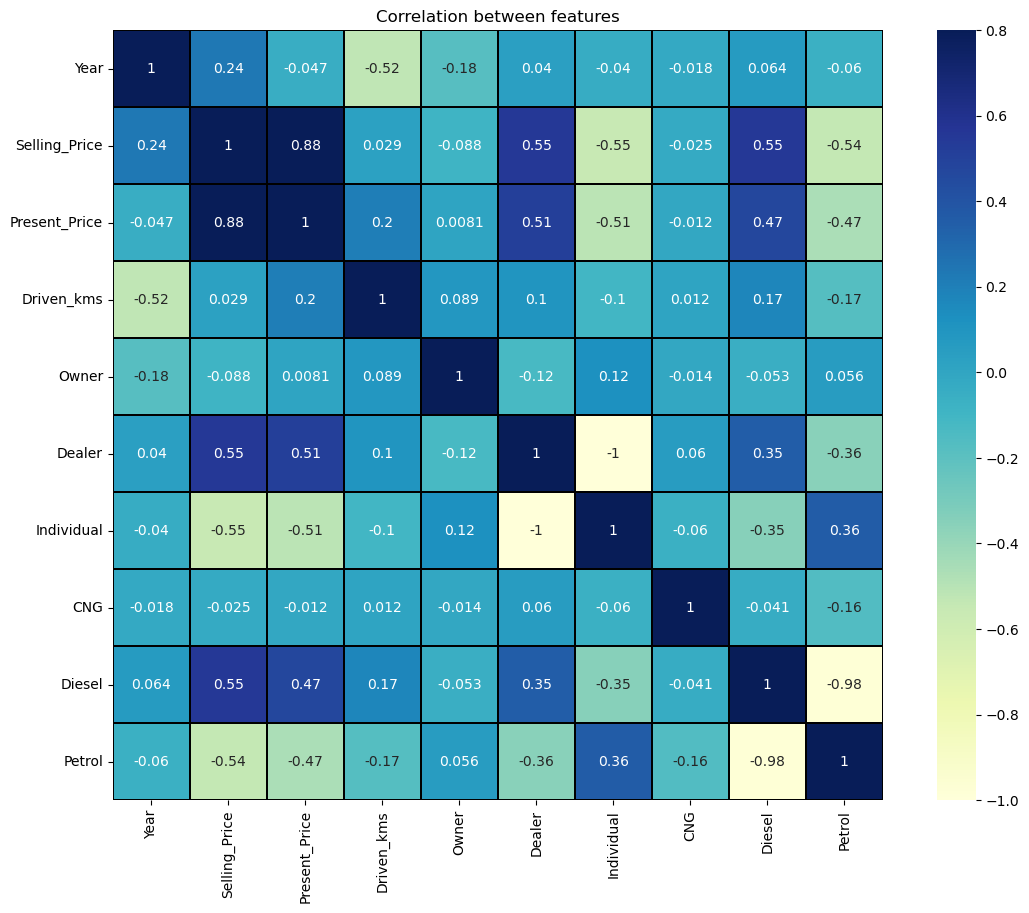

In [203]:
corr=merged.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

# The selling price of the car has a positive correlation with dealer and petrol fuel type
# The selling price is neegatively correlated with the individual which shows dealers has successful in selling old cars


# Univariate analysis

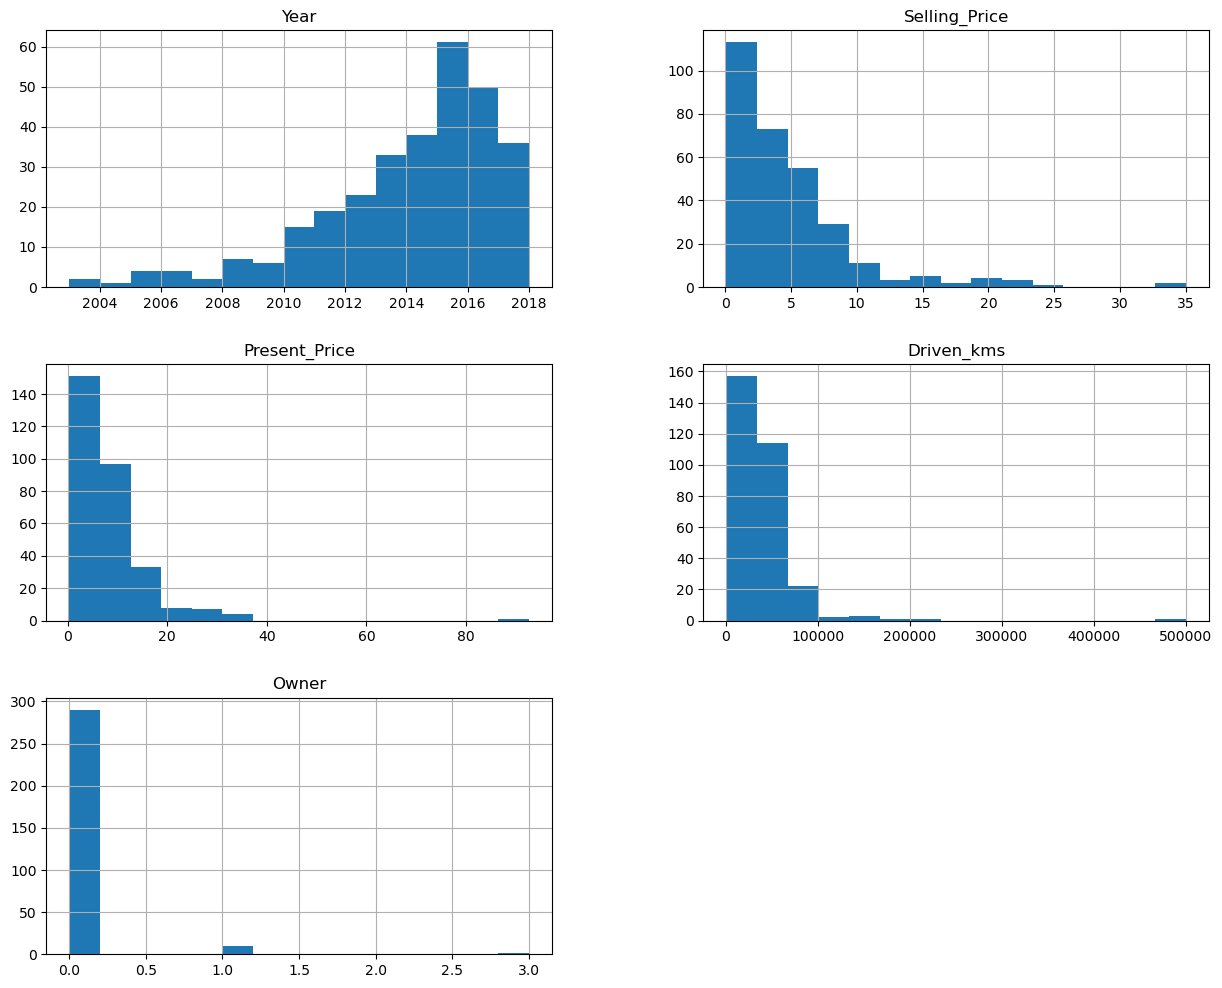

In [23]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [163]:
Carname_frq = df['Car_Name'].value_counts()
Carname_frq

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [164]:
df['car_name_frq'] = df['Car_Name'].map(Carname_frq)

In [165]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_type,Selling_type,car_name_frq
0,ritz,2014,3.35,5.59,27000,0,3,1,4
1,sx4,2013,4.75,9.54,43000,0,2,1,6
2,ciaz,2017,7.25,9.85,6900,0,3,1,9
3,wagon r,2011,2.85,4.15,5200,0,3,1,4
4,swift,2014,4.60,6.87,42450,0,2,1,5


In [168]:
df=df.drop(['Car_Name'],axis=1)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_type,Selling_type,car_name_frq
0,2014,3.35,5.59,27000,0,3,1,4
1,2013,4.75,9.54,43000,0,2,1,6
2,2017,7.25,9.85,6900,0,3,1,9
3,2011,2.85,4.15,5200,0,3,1,4
4,2014,4.60,6.87,42450,0,2,1,5


In [169]:
X = df.drop(["Selling_Price"], axis=1)
y = df["Selling_Price"]
X,y

(     Year  Present_Price  Driven_kms  Owner  Fuel_type  Selling_type  \
 0    2014           5.59       27000      0          3             1   
 1    2013           9.54       43000      0          2             1   
 2    2017           9.85        6900      0          3             1   
 3    2011           4.15        5200      0          3             1   
 4    2014           6.87       42450      0          2             1   
 ..    ...            ...         ...    ...        ...           ...   
 296  2016          11.60       33988      0          2             1   
 297  2015           5.90       60000      0          3             1   
 298  2009          11.00       87934      0          3             1   
 299  2017          12.50        9000      0          2             1   
 300  2016           5.90        5464      0          3             1   
 
      car_name_frq  
 0               4  
 1               6  
 2               9  
 3               4  
 4               

In [170]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=36)

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [174]:
print('Mean squared error: ',mean_squared_error(y_test,y_pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred_lr))
print('R2 score: ',r2_score(y_test,y_pred_lr))

Mean squared error:  2.260752291326928
Mean absolute error:  1.0629334689215784
R2 score:  0.885658204947383


# The accuracy of the model in linear regression is 88%

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    'RandomForestRegressor': RandomForestRegressor()
    # ,'LinearRegression': LinearRegression()
}

# Define the parameters for grid search
params = {
    'RandomForestRegressor': { 'n_estimators': [75,100,125,150], 'max_features': ['sqrt', 'log2'] }
    # ,'LinearRegression': {  }
}

In [177]:
for model_name, model in models.items():
    model_to_tune = GridSearchCV(model, params[model_name], cv=5)
    model_to_tune.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {model_to_tune.best_params_}")
    print(f"Best score for {model_name}: {model_to_tune.best_score_}")


Best parameters for RandomForestRegressor: {'max_features': 'log2', 'n_estimators': 150}
Best score for RandomForestRegressor: 0.8685178460800984


# The Random forest regressor shows 86% accuracy

In [178]:
import xgboost 
from xgboost import XGBRegressor


In [180]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [181]:
predictions = xgb.predict(X_test)
print(predictions,y_test)

[ 3.5193887   5.499003    4.829225    7.4154043   5.3564663   7.4027343
  2.4013627   4.3852224   5.2250414   3.898231    0.43666795  5.311903
  2.9144537   0.4810755   7.2853193   0.43400455  5.4405556   2.5239897
  0.8252268   0.59172875 20.193785   11.647247    0.71611124  0.63790417
  1.374285    4.5075083   5.5176563   7.9199686   5.151578   14.6372795
  9.128171    2.8713915   0.4001355   8.140923    0.25494137 22.890162
  3.754958    4.612435    5.2296653   3.5681462   7.910055    0.5796453
  1.0936399   9.756179    1.1561269   0.23758468  5.7360997   2.8628724
  0.48331568  5.021854    4.812762    6.138522    9.231138    3.0570428
  3.9044049   1.099091    0.42442948  5.125897    6.9980626   1.4356622
  9.231138  ] 55     3.60
230    6.15
294    3.75
269    6.70
27     6.00
       ... 
171    0.40
261    5.50
72     7.45
102    1.65
258    8.40
Name: Selling_Price, Length: 61, dtype: float64


In [182]:
print('Mean squared error: ',mean_squared_error(y_test,predictions))
print('Mean absolute error: ',mean_absolute_error(y_test,predictions))
print('R2 score: ',r2_score(y_test,predictions))

Mean squared error:  0.4711182834515695
Mean absolute error:  0.45002233317640955
R2 score:  0.9761723075904338


# After using XGBoost regressor the accuracy of the model is 97% 